In [1]:

ḡ_Na, ḡ_K, ḡ_L = 120, 36, 0.3;
E_Na, E_K, E_L = 50, -77, -54.4;


alpha_n(V) = 0.01*(V+55)/(1-exp(-(V+55)/10))
beta_n(V) = 0.125*exp(-(V+65)/80)

alpha_m(V) = 0.1*(V+40)/(1-exp(-(V+40)/10))
beta_m(V) = 4*exp(-(V+65)/18)

alpha_h(V) = 0.07*exp(-(V+65)/20)
beta_h(V) = 1/(1+exp(-(V+35)/10))

n_infty(V) = alpha_n(V)/(alpha_n(V)+beta_n(V))
m_infty(V) = alpha_m(V)/(alpha_m(V)+beta_m(V))
h_infty(V) = alpha_h(V)/(alpha_h(V)+beta_h(V))

tau_n(V) = 1 /  (alpha_n(V)+ beta_n(V))
tau_m(V) = 1 /  (alpha_m(V) + beta_m(V))
tau_h(V) = 1 /  (alpha_h(V) + beta_h(V))

tau_h (generic function with 1 method)

In [2]:
using CairoMakie, LinearAlgebra
using Makie.Colors


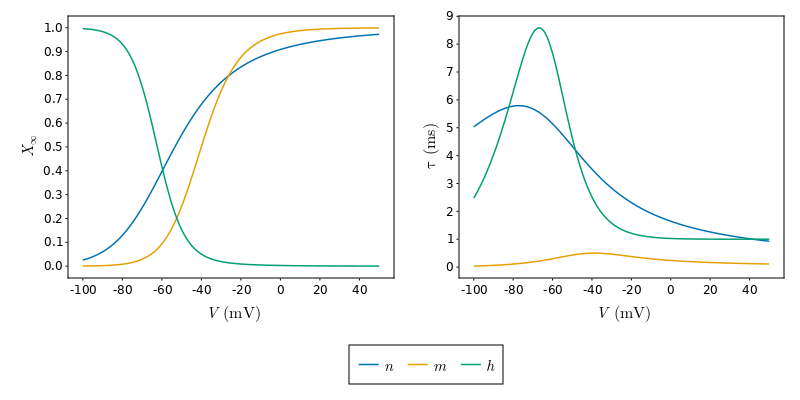

In [3]:
x = LinRange(-100,50,1000)

f = Figure(resolution = (800,400))
ax1 = Axis(
    f[1, 1],
    xlabel = L"$V$ (mV)",
    ylabel = L"X_{\infty}",
    tellwidth = true,
    xticks = [-100:20:50...],
    yticks = [0:0.1:1.0...],
    xticksize = 2,
    yticksize = 2,
    xticklabelsize = 12,
    yticklabelsize = 12,
    )
ax2 = Axis(f[1,2],
    xlabel = L"$V$ (mV)",
    ylabel = L"$\tau$ (ms)",
    tellwidth = true,
    xticks = [-100:20:50...],
    yticks = [0:1:9...],
    xticksize = 2,
    yticksize = 2,
    xticklabelsize = 12,
    yticklabelsize = 12,
)
l1 = lines!(ax1, x, n_infty.(x))
l2=lines!(ax1, x, m_infty.(x))
l3 = lines!(ax1, x, h_infty.(x))
hidedecorations!(ax1;label = false, ticklabels = false, ticks = false, grid = true, minorgrid = true, minorticks = true)
lines!(ax2, x, tau_n.(x))
lines!(ax2, x, tau_m.(x))
lines!(ax2, x, tau_h.(x))
hidedecorations!(ax1;label = false, ticklabels = false, ticks = false, grid = true, minorgrid = true, minorticks = true)
hidedecorations!(ax2;label = false, ticklabels = false, ticks = false, grid = true, minorgrid = true, minorticks = true)

Legend(f[2,1:2], [l1, l2,l3], [L"n",L"m",L"h"],nbanks=3,tellheight=true)

f

In [4]:
CairoMakie.activate!(type = "svg")

# save("/Users/zhengpanpan/Pictures/steady_and_time_constant.svg", f)
